# Explore here

It's recommended to use this notebook for exploration purposes.

## STEP1 - DOWNLOAD HTML 

In [2]:
# import modules 
import os
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen

# download HTML 
def fetch_html(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Automatically raises an exception for 4xx and 5xx errors
        return response.text
    except requests.exceptions.RequestException as e:
        raise Exception(f"Error accessing the page: {e}")

url = 'https://companies-market-cap-copy.vercel.app/index.html'
html_download= fetch_html(url)
html_download

'\n<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>Tesla (TSLA) - Revenue</title>\n<meta charset="utf-8"/>\n<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">\n<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">\n<link rel="ic

## STEP2 - TRANSFORM HTML as a SOUP OBJECT

In [3]:
soup = BeautifulSoup(html_download, "html.parser")
print(type(soup))
title = soup.title
print(title)

<class 'bs4.BeautifulSoup'>
<title>Tesla (TSLA) - Revenue</title>


## STEP3 - EXTRACT TABLES FROM SOUP OBJECT 

In [4]:
table = soup.find("table")  
table

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span

## STEP4 - GET YEAR and REV FROM TABLE 

In [5]:
# Extract the rows 

rows = table.find_all("tr")

# Process table data
table_data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    table_data.append([date, revenue])

table_data

[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

## STEP5 - CREATE A DATAFRAME

In [6]:
df = pd.DataFrame(table_data, columns=["Year", "Revenue"])

# Sort the data by the 'Date' column in ascending order 
df = df.sort_values("Year")

df

,Year,Revenue
15,2009,$0.11 B
14,2010,$0.11 B
13,2011,$0.20 B
12,2012,$0.41 B
11,2013,$2.01 B
10,2014,$3.19 B
9,2015,$4.04 B
8,2016,$7.00 B
7,2017,$11.75 B
6,2018,$21.46 B


STEP6 - CLEAN REV COLUMN and EXTRACT NUMBERS 

In [7]:
# Clean and convert the income values to numbers
def convert_revenue(value):
    if "B" in value:
        edit_value = float(value.replace("B", "").replace("$", "").replace(",", ""))
        return edit_value


df["Revenue"] = df["Revenue"].apply(convert_revenue)

df["Revenue"]

15     0.11
14     0.11
13     0.20
12     0.41
11     2.01
10     3.19
9      4.04
8      7.00
7     11.75
6     21.46
5     24.57
4     31.53
3     53.82
2     81.46
1     96.77
0     97.15
Name: Revenue, dtype: float64

## STEP6 - CONNECT TO A SQL DB AND STORE DF 

In [8]:
# Connect to SQLite and save the data
conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()

In [9]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS revenue (
    year TEXT,
    revenue REAL
)
""")


## STEP7 - INSERT DATA  INTO DB 

In [10]:
#Insert data into the database
for index, row in df.iterrows():
    cursor.execute("INSERT INTO revenue (year, revenue) VALUES (?, ?)", (row["Year"], row["Revenue"]))
    print(row["Year"], row["Revenue"])

conn.commit()
conn.close()

2009 0.11
2010 0.11
2011 0.2
2012 0.41
2013 2.01
2014 3.19
2015 4.04
2016 7.0
2017 11.75
2018 21.46
2019 24.57
2020 31.53
2021 53.82
2022 81.46
2023 96.77
2024 97.15


In [ ]:
# using SQL DB
#con = sqlite3.connect("tesla_revenues.db")
#dupe = pd.read_sql("SELECT * FROM revenue", con)
#dupe.head() 

,year,revenue
0,2009,0.11
1,2010,0.11
2,2011,0.20
3,2012,0.41
4,2013,2.01


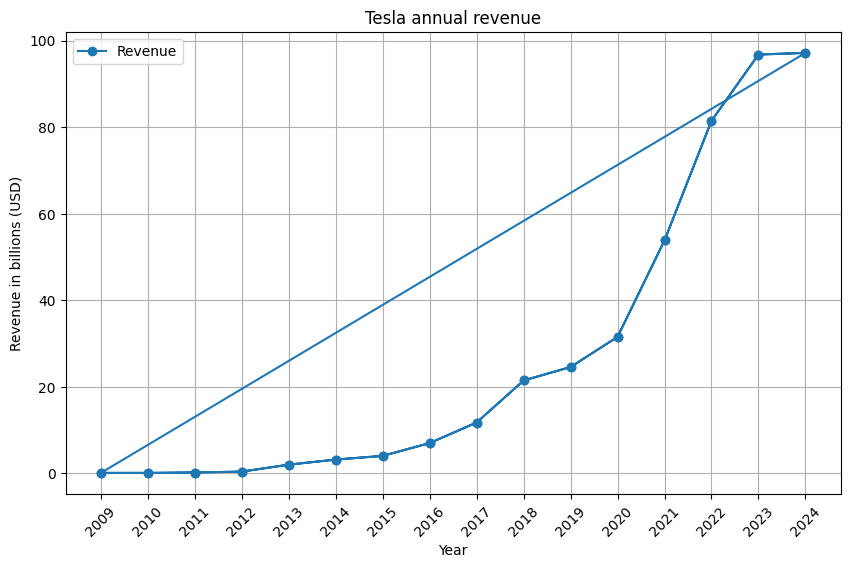

In [ ]:
# Plot the data using SQL DB 
#plt.figure(figsize=(10, 6))
#plt.plot(dupe.year, dupe.revenue, marker='o', label="Revenue")
#plt.title("Tesla annual revenue")
#plt.xlabel("Year")
#plt.ylabel("Revenue in billions (USD)")
#plt.xticks(rotation=45)
#plt.legend()
#plt.grid(True)

# Save and display the chart
#plt.savefig("revenue_plot.png")
#plt.show()

## STEP8 - PLOT GRAPH 

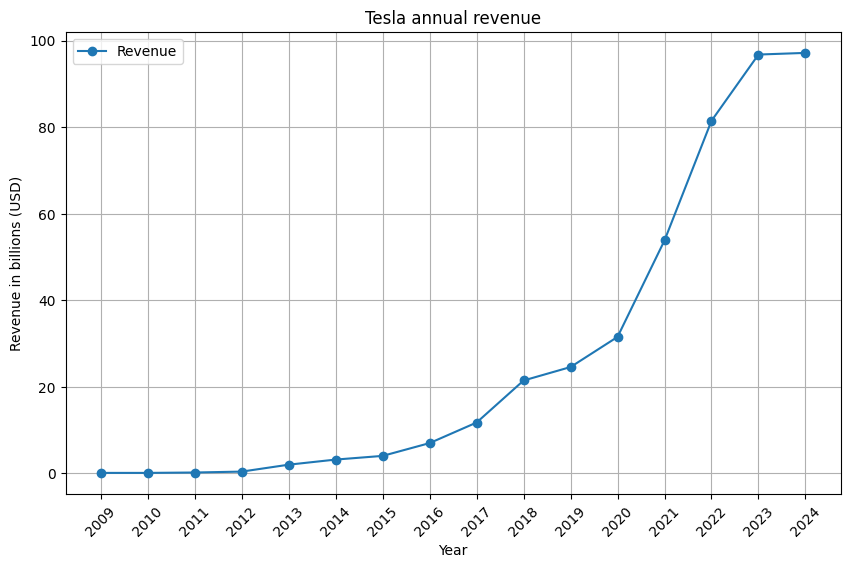

In [11]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Revenue"], marker='o', label="Revenue")
plt.title("Tesla annual revenue")
plt.xlabel("Year")
plt.ylabel("Revenue in billions (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Save and display the chart
plt.savefig("revenue_plot.png")
plt.show()